In [99]:
library(tidyverse)
library(RColorBrewer)
library(repr)

In [3]:
sales_Data <- read.csv('competitive-data-science-predict-future-sales/sales_train.csv')
testData <- read.csv('competitive-data-science-predict-future-sales/test.csv')
itemsData <- read.csv('competitive-data-science-predict-future-sales/items.csv')
shopsData <- read.csv('competitive-data-science-predict-future-sales/shops.csv')
itemsCatData <- read.csv('competitive-data-science-predict-future-sales/item_categories.csv')

In [4]:
head(sales_Data)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,02.01.2013,0,59,22154,999.00,1
2,03.01.2013,0,25,2552,899.00,1
3,05.01.2013,0,25,2552,899.00,-1
4,06.01.2013,0,25,2554,1709.05,1
5,15.01.2013,0,25,2555,1099.00,1
6,10.01.2013,0,25,2564,349.00,1


In [6]:
sales_Data$date <- as.Date(sales_Data$date, format = "%d.%m.%Y")
sales_Data <- sales_Data %>% arrange(sales_Data$date)
head(sales_Data)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
,<date>,<int>,<int>,<int>,<dbl>,<dbl>
1,2013-01-01,0,19,18976,399,1
2,2013-01-01,0,19,18284,199,1
3,2013-01-01,0,19,18320,199,1
4,2013-01-01,0,19,18329,299,1
5,2013-01-01,0,19,19367,399,1
6,2013-01-01,0,19,18823,299,1


1

In [73]:
# df <- sum(sales_Data[which(sales_Data$shop_id=='1'), 6])
df<-c()
# nrow(sales_Data)
summary(sales_Data)
shops <- sort(unique(sales_Data$shop_id))
for(shop in shops){   
    df<-rbind(df,c(shop,sum(sales_Data[which(sales_Data$shop_id==shop), 6])))
#     cat(shop,"\t",df,"\n")
}
# head(df)
summary(df)

      date            date_block_num     shop_id      item_id     
 Min.   :2013-01-01   Min.   : 0.00   Min.   : 0   Min.   :    0  
 1st Qu.:2013-08-01   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Median :2014-03-04   Median :14.00   Median :31   Median : 9343  
 Mean   :2014-04-03   Mean   :14.57   Mean   :33   Mean   :10197  
 3rd Qu.:2014-12-05   3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
 Max.   :2015-10-31   Max.   :33.00   Max.   :59   Max.   :22169  
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  

       V1              V2        
 Min.   : 0.00   Min.   :   330  
 1st Qu.:14.75   1st Qu.: 23333  
 Median :29.50   Median : 50176  
 Mean   :29.50   Mean   : 60803  
 3rd Qu.:44.25   3rd Qu.: 69562  
 Max.   :59.00   Max.   :310777  

Warning message in brewer.pal(10, "Set2"):
"n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
"
Warning message in plot.window(xlim, ylim, log = log, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"graphical parameter "type" is obsolete"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"graphical parameter "type" is obsolete"


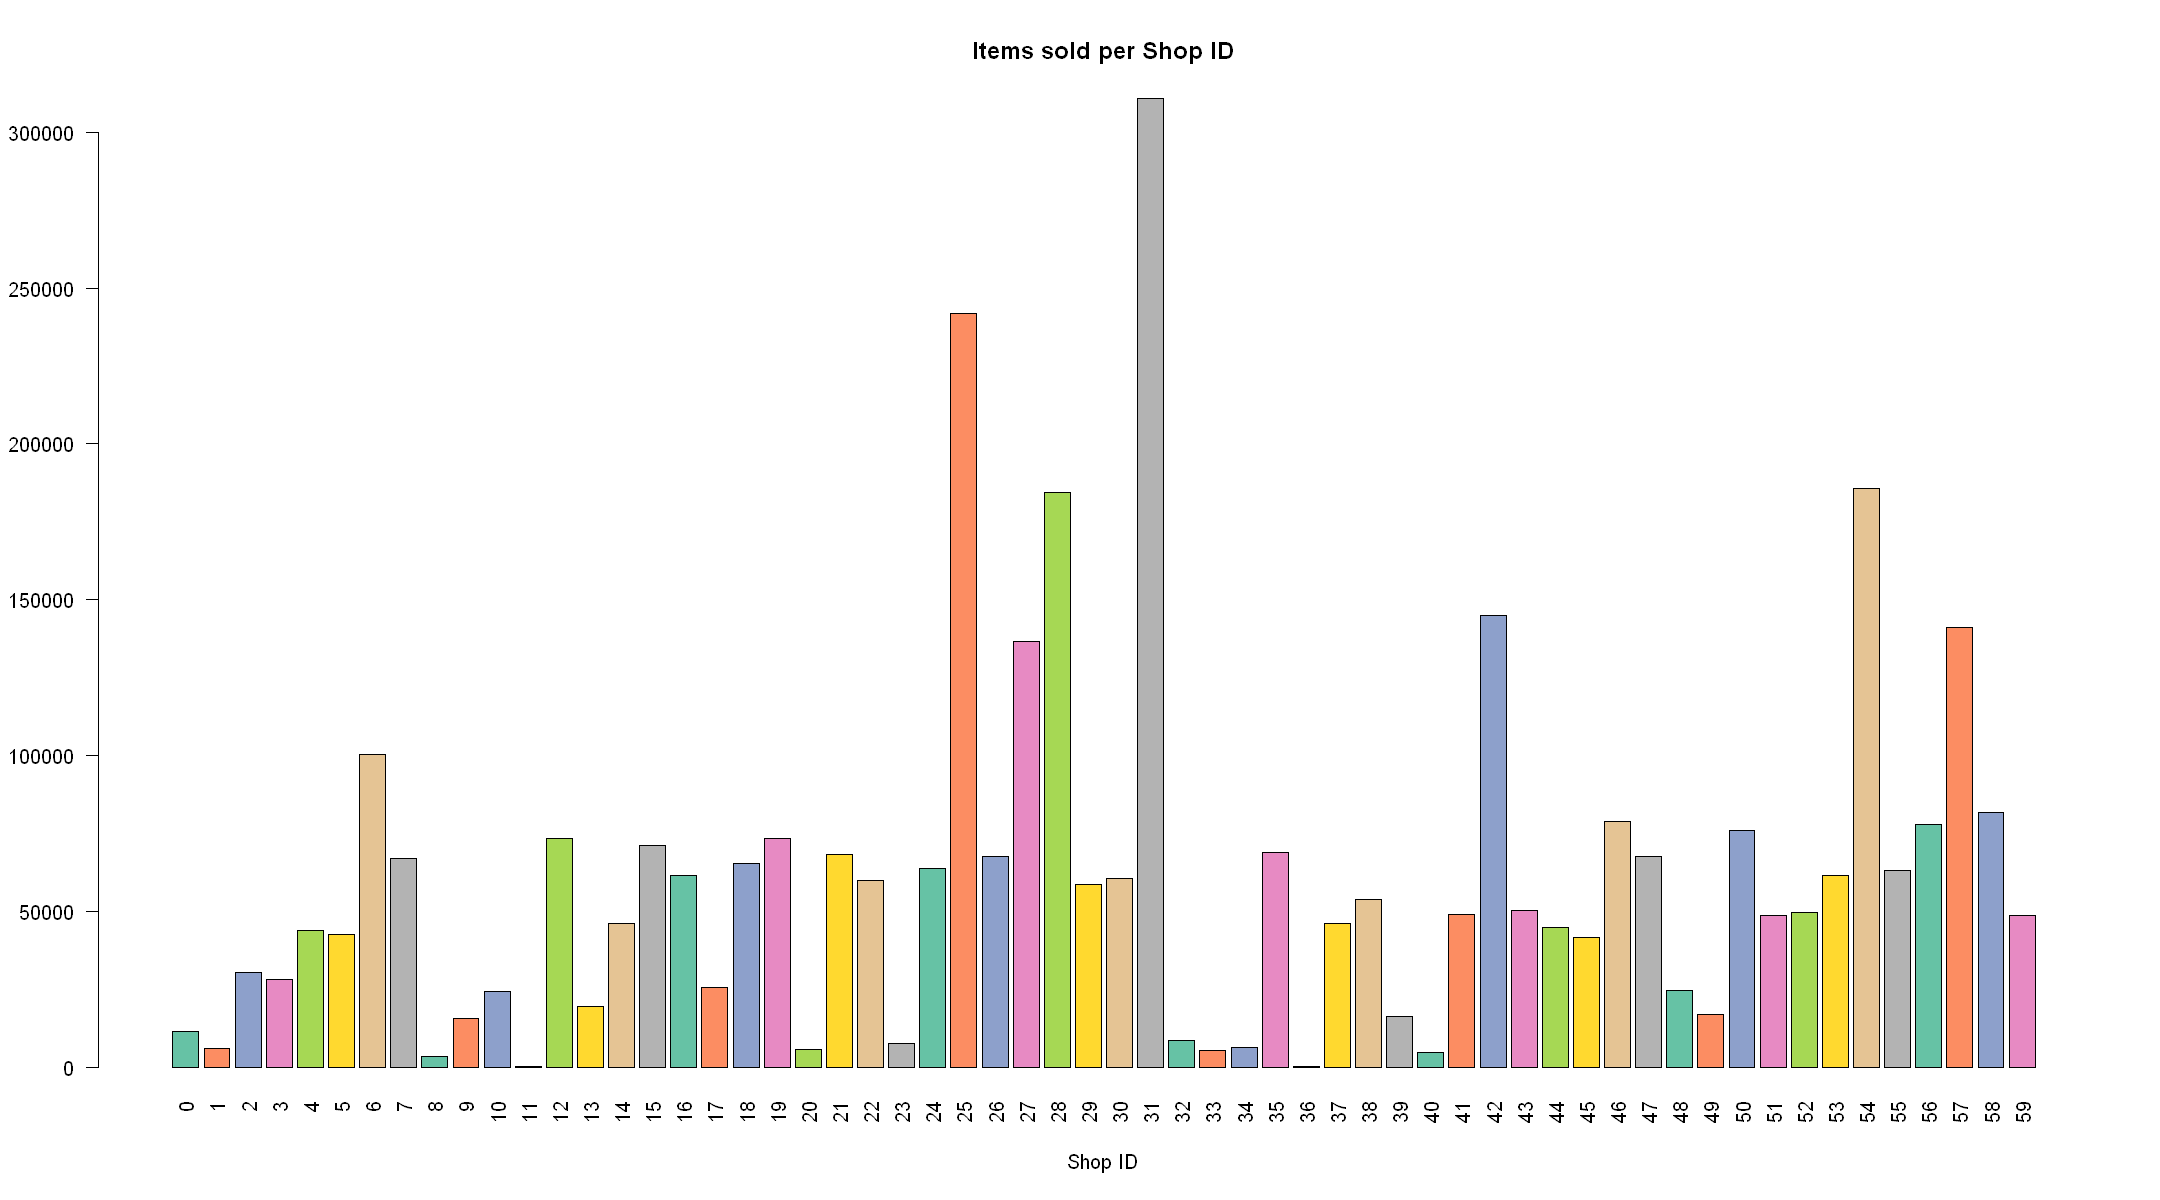

In [105]:
coul <- brewer.pal(10, "Set2")
options(repr.plot.width=18, repr.plot.height=10)
barplot(df[,2] ~ df[,1],type="h",ylab="",xlab="Shop ID",main="Items sold per Shop ID",las=2,cex.names=1,col=coul)

In [76]:
train_monthly<-train_monthly%>%transmute(date_block_num,shop_id, item_category_id, item_id,item_cnt_day,item_price,revenue)%>%group_by(date_block_num,shop_id, item_category_id, item_id)%>%summarize(item_cnt_month=sum(item_cnt_day),mean_item_cnt=mean(item_cnt_day),mean_item_price=mean(item_price),revenue_month=sum(revenue))
train_monthly[train_monthly['shop_id'] == 0, 'shop_id'] = 57
train_monthly[train_monthly['shop_id']== 1, 'shop_id'] = 58
train_monthly[train_monthly['shop_id'] == 11, 'shop_id'] = 10
train_monthly[train_monthly['shop_id'] == 40, 'shop_id'] = 39
head(train_monthly)
summary(train_monthly)

`summarise()` has grouped output by 'date_block_num', 'shop_id', 'item_category_id'. You can override using the
`.groups` argument.


date_block_num,shop_id,item_category_id,item_id,item_cnt_month,mean_item_cnt,mean_item_price,revenue_month
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,57,2,5572,10,1.666667,1322,13220
0,57,2,5573,1,1.000000,560,560
0,57,2,5575,4,1.333333,806,3224
0,57,2,5576,5,1.000000,2231,11155
0,57,2,5609,1,1.000000,2381,2381
0,57,2,5612,1,1.000000,3623,3623


 date_block_num     shop_id      item_category_id    item_id     
 Min.   : 0.00   Min.   : 2.00   Min.   : 0.00    Min.   :    0  
 1st Qu.: 6.00   1st Qu.:21.00   1st Qu.:30.00    1st Qu.: 5036  
 Median :14.00   Median :31.00   Median :40.00    Median :10498  
 Mean   :14.65   Mean   :33.11   Mean   :41.75    Mean   :10689  
 3rd Qu.:23.00   3rd Qu.:48.00   3rd Qu.:55.00    3rd Qu.:16100  
 Max.   :33.00   Max.   :59.00   Max.   :83.00    Max.   :22169  
 item_cnt_month     mean_item_cnt     mean_item_price   revenue_month      
 Min.   :   1.000   Min.   :  1.000   Min.   :   0.09   Min.   :      0.1  
 1st Qu.:   1.000   1st Qu.:  1.000   1st Qu.: 199.00   1st Qu.:    249.0  
 Median :   1.000   Median :  1.000   Median : 388.30   Median :    499.0  
 Mean   :   2.268   Mean   :  1.074   Mean   : 666.33   Mean   :   1749.5  
 3rd Qu.:   2.000   3rd Qu.:  1.000   3rd Qu.: 824.33   3rd Qu.:   1398.0  
 Max.   :1644.000   Max.   :500.000   Max.   :4999.24   Max.   :2595200.0  

In [90]:
cats <- sort(unique(train_monthly$item_category_id))
df1 <-c()
for(category in cats){   
    df1<-rbind(df1,c(category,sum(train_monthly[which(train_monthly$item_category_id==category), 5])))
#     cat(shop,"\t",df,"\n")
}
head(df1)
summary(df1)

0,48768
1,11346
2,119708362
3,175278317
4,16395750
5,40264582


       V1              V2           
 Min.   : 0.00   Min.   :6.669e+03  
 1st Qu.:20.75   1st Qu.:2.230e+06  
 Median :41.50   Median :4.964e+07  
 Mean   :41.50   Mean   :3.518e+08  
 3rd Qu.:62.25   3rd Qu.:2.942e+08  
 Max.   :83.00   Max.   :8.274e+09  

Warning message in plot.window(xlim, ylim, log = log, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"graphical parameter "type" is obsolete"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"graphical parameter "type" is obsolete"


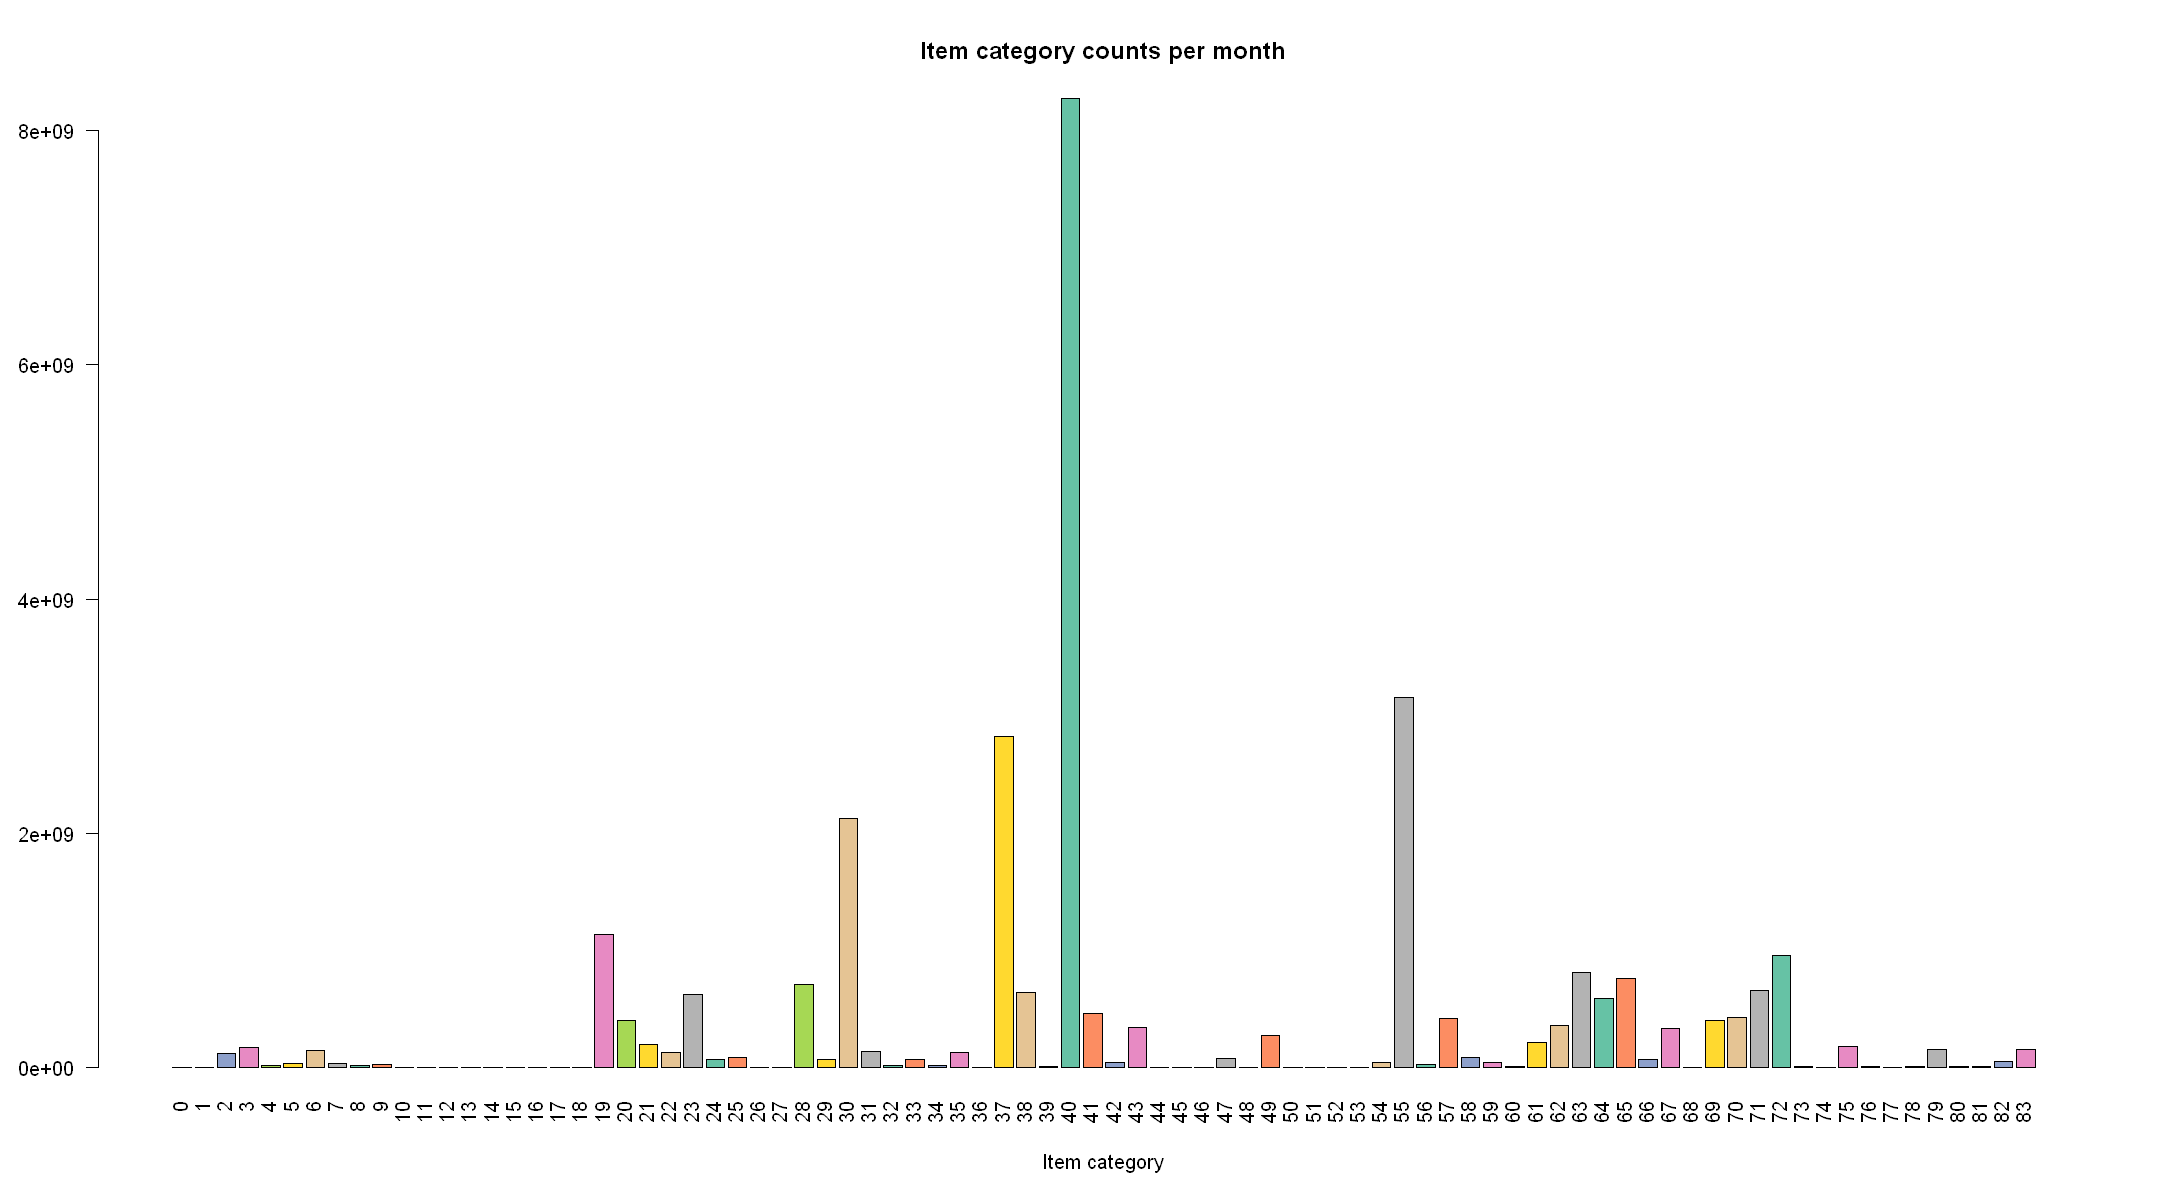

In [104]:
options(repr.plot.width=18, repr.plot.height=10)
barplot(df1[,2] ~ df1[,1],type="h",ylab="",xlab="Item category",main="Item category counts per month",las=2,cex.names=1,col=coul)